In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [46]:
# Perfect sensor
def sense(x):
    return x

In [55]:
def simulate(Δt, x, u):
    x[2:] += Δt*u
    x[0:2] += Δt * x[2:]
    if x[1] <=0:
        x[3] = -1*x[3]
    return x

In [56]:
def control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    ux = 0
    uy = -1 #gravity ( for now: gravity should probobly be in simulate)
    return array([ux, uy])

In [63]:
tf = 5.
Δt = .1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([2., 1., 0 , 0])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)    
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

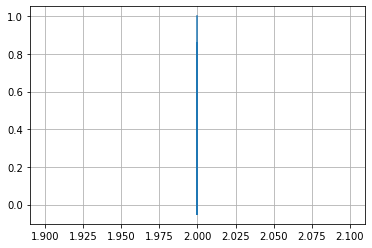

In [64]:
grid()
plot(x_log[:,0], x_log[:,1])

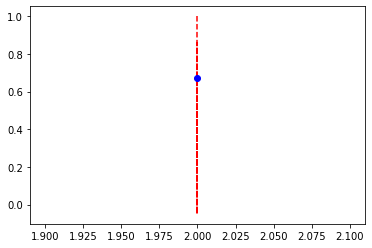

In [65]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())